In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [99]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Jesse_Merged_Data.csv", parse_dates=['Date'], index_col='Date')

In [100]:
df.drop(columns = ["Prime_Rate_2", "UT_Graduate_Enrolment", 'Ryerson_Total_Enrolment', 'UT_Undergraduate_Enrolment', 'York_Total_Enrolment', 'Bank_of_Canada_Overnight_Rate', 'Ontario_population', 'Unemployment_rate_toronto', "Ontario_Immigrants_International", "Ontario_Emigrants_International", "Ontario_In_migrant_Interprovincial", "Participation_rate_toronto", "Exchange Rate", "Ontario_Out_migrant_Interprovincial"], inplace=True)

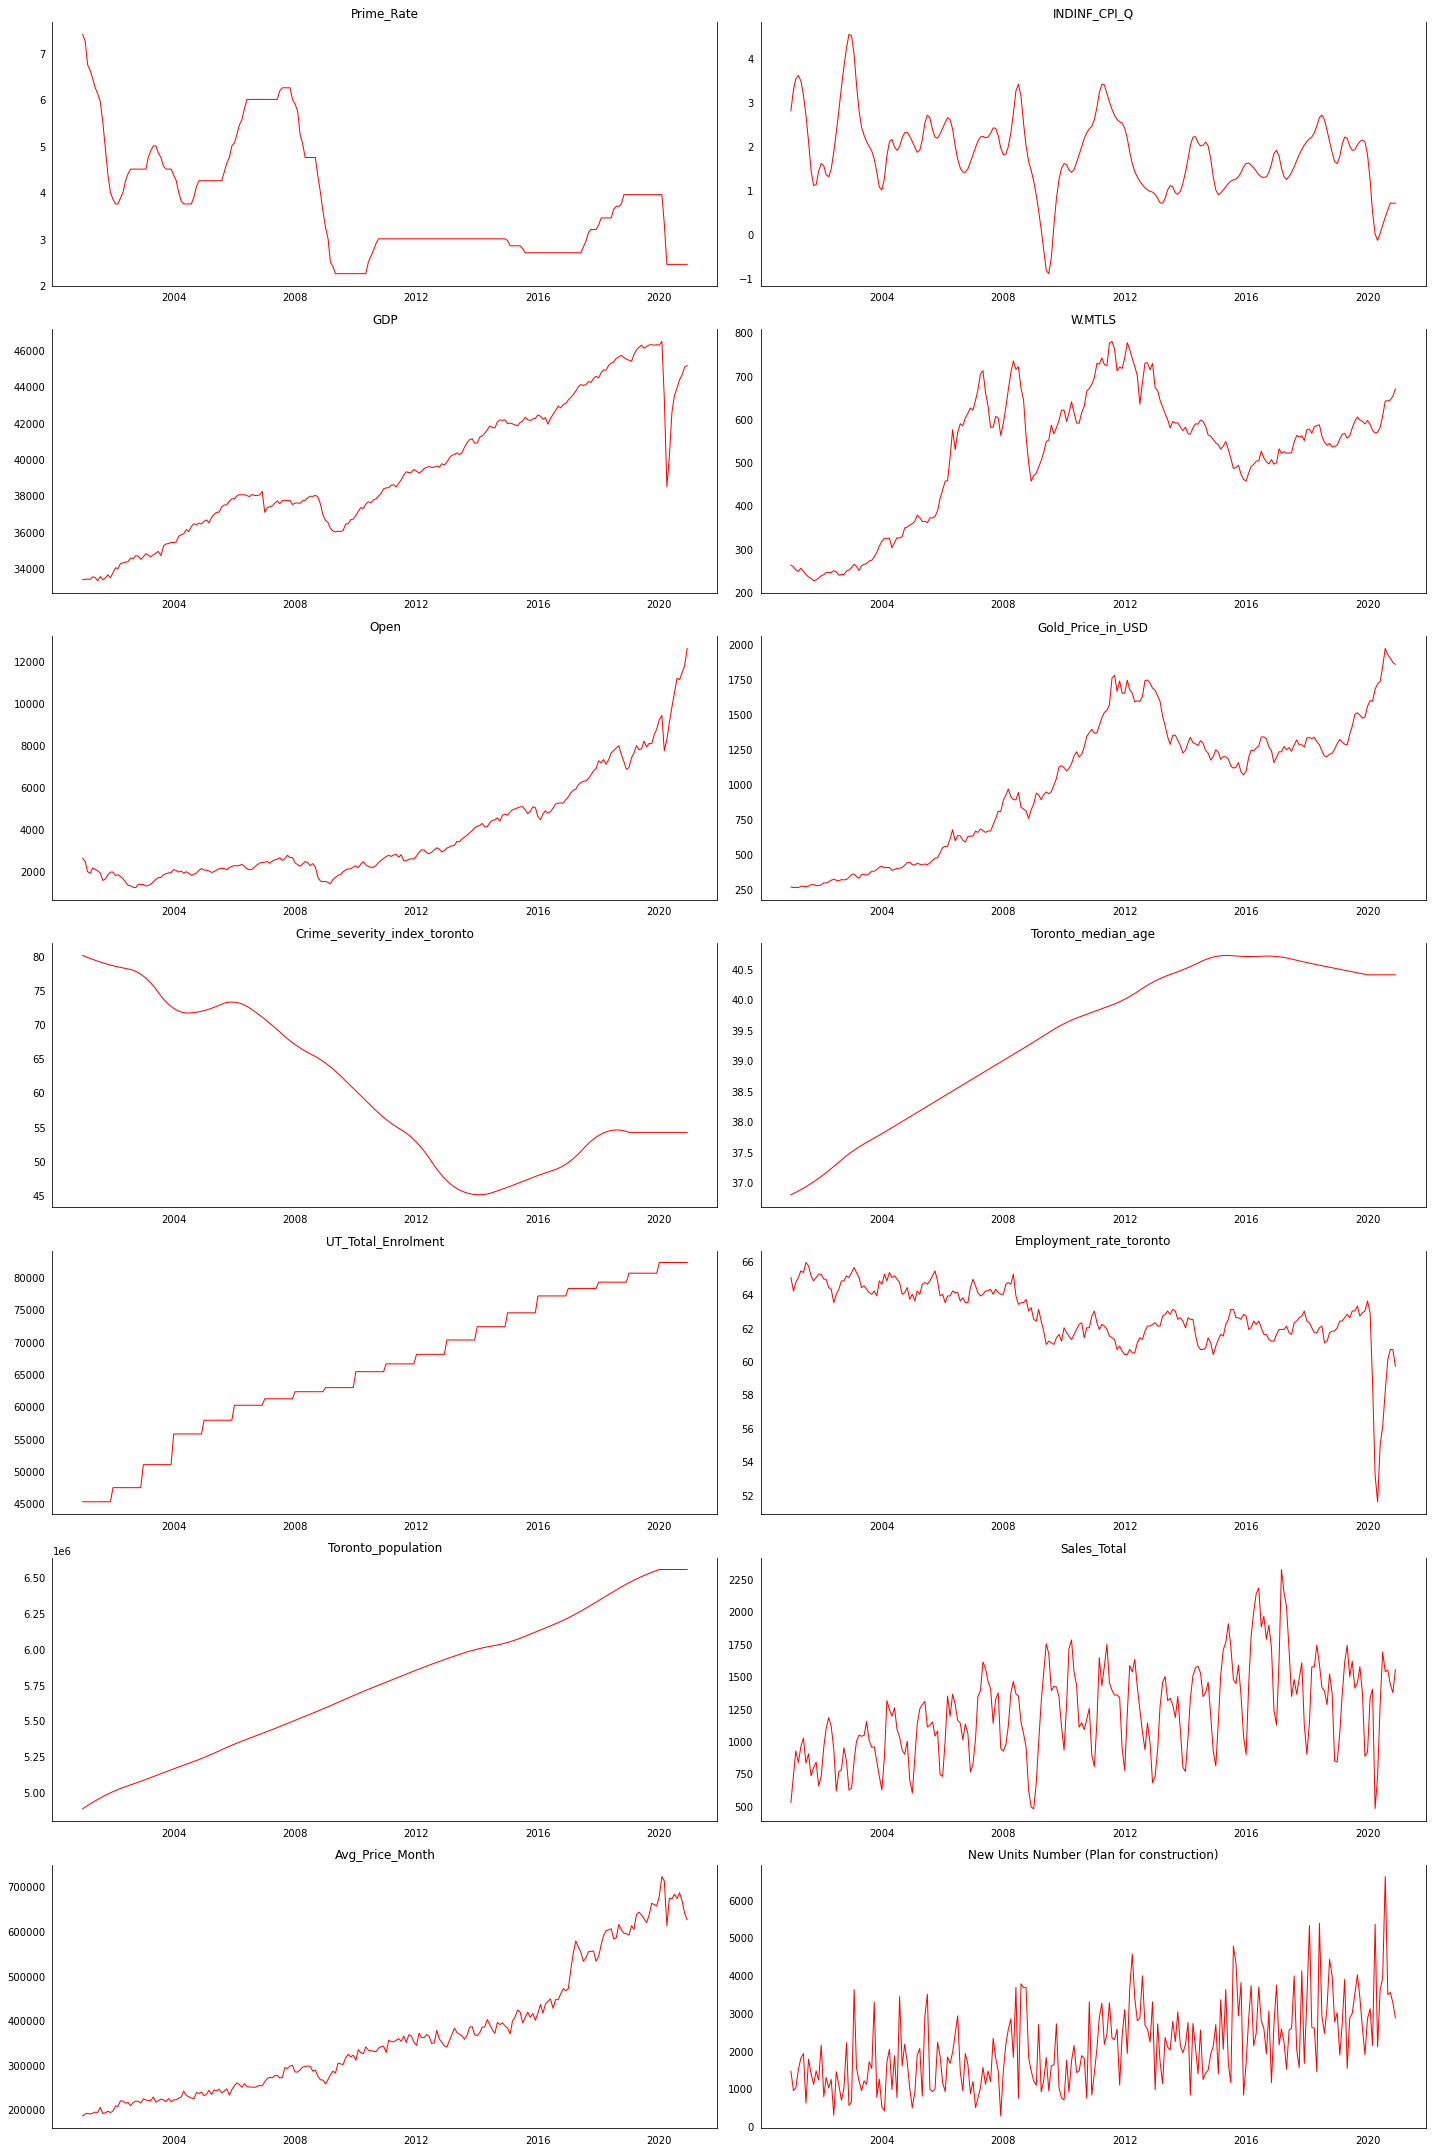

In [101]:
# Plot
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20,30))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

plt.tight_layout();

In [102]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,Prime_Rate_x,INDINF_CPI_Q_x,GDP_x,W.MTLS_x,Open_x,Gold_Price_in_USD_x,Crime_severity_index_toronto_x,Toronto_median_age_x,UT_Total_Enrolment_x,Employment_rate_toronto_x,Toronto_population_x,Sales_Total_x,Avg_Price_Month_x,New Units Number (Plan for construction)_x,New Units Number (construction complete)_x
Prime_Rate_y,1.0000,0.0000,0.0256,0.0377,0.0000,0.0333,0.0230,0.0000,0.1247,0.0236,0.0000,0.0044,0.0006,0.0139,0.2971
INDINF_CPI_Q_y,0.0059,1.0000,0.0212,0.0047,0.0194,0.0059,0.0097,0.0135,0.0183,0.0078,0.0070,0.3301,0.0211,0.0205,0.3577
GDP_y,0.0064,0.0005,1.0000,0.2711,0.0000,0.0969,0.0206,0.0000,0.0001,0.0000,0.0000,0.0250,0.0000,0.0052,0.0902
W.MTLS_y,0.4796,0.1119,0.4981,1.0000,0.5420,0.1288,0.3152,0.4124,0.4179,0.1466,0.5607,0.0606,0.5783,0.0683,0.4334
Open_y,0.0051,0.0056,0.0000,0.2906,1.0000,0.0210,0.5276,0.0000,0.5670,0.0000,0.0000,0.3029,0.0013,0.2708,0.0123
Gold_Price_in_USD_y,0.1313,0.3517,0.0012,0.0670,0.2291,1.0000,0.1289,0.0948,0.2271,0.0021,0.0018,0.0202,0.0800,0.0724,0.1602
Crime_severity_index_toronto_y,0.0295,0.0001,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0232,0.0000,0.0050,0.0000,0.0064,0.0064
Toronto_median_age_y,0.0027,0.0069,0.0000,0.0000,0.0000,0.0001,0.0000,1.0000,0.0000,0.0114,0.0000,0.0330,0.0000,0.0006,0.0573
UT_Total_Enrolment_y,0.0882,0.9100,0.1092,0.0008,0.5694,0.3343,0.0003,0.0000,1.0000,0.9601,0.0000,0.0000,0.0317,0.0341,0.3032
Employment_rate_toronto_y,0.0000,0.0023,0.0000,0.0041,0.0000,0.0000,0.0004,0.0000,0.0000,1.0000,0.0000,0.0401,0.0000,0.0689,0.0210


In [103]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Prime_Rate ::  867.68    > nan       =>   False
INDINF_CPI_Q ::  722.77    > nan       =>   False
GDP    ::  604.2     > nan       =>   False
W.MTLS ::  490.22    > 311.1288  =>   True
Open   ::  391.8     > 263.2603  =>   True
Gold_Price_in_USD ::  316.96    > 219.4051  =>   True
Crime_severity_index_toronto ::  255.67    > 179.5199  =>   True
Toronto_median_age ::  197.34    > 143.6691  =>   True
UT_Total_Enrolment ::  147.34    > 111.7797  =>   True
Employment_rate_toronto ::  107.53    > 83.9383   =>   True
Toronto_population ::  75.0      > 60.0627   =>   True
Sales_Total ::  44.36     > 40.1749   =>   True
Avg_Price_Month ::  26.52     > 24.2761   =>   True
New Units Number (Plan for construction) ::  12.17     > 12.3212   =>   False
New Units Number (construction complete) ::  1.72      > 4.1296    =>   False


C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:579: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)


In [104]:
nobs = 72
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(168, 15)
(72, 15)


In [105]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [106]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2521
 No. Lags Chosen       = 5
 Critical value 1%     = -3.471
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.1879. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0113
 No. Lags Chosen       = 8
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.577
 => P-Value = 0.0338. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Sta

In [107]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [108]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8638
 No. Lags Chosen       = 4
 Critical value 1%     = -3.471
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0023. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.0813
 No. Lags Chosen       = 7
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

In [109]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [110]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6496
 No. Lags Chosen       = 5
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.0668
 No. Lags Chosen       = 14
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Lev

In [117]:
df_differenced

,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,
2001-03-01,-0.350,-0.225413,-14.147110,-3.5205,-308.589581,5.248995,0.019826,-0.001099,0.0,1.3,-1468.647128,-11.0,-2747.5181,580.0,444.0
2001-04-01,0.375,-0.172080,-15.744308,4.2550,405.675104,-3.763248,-0.009493,0.002983,0.0,-0.2,802.868540,-282.0,-3159.0460,419.0,604.0
2001-05-01,-0.050,-0.201333,147.103327,10.3995,318.940629,14.181910,0.009889,0.000232,0.0,0.1,-700.918881,211.0,3529.1749,-181.0,-1740.0
2001-06-01,-0.025,-0.200244,-187.110333,-14.0915,-317.235122,-13.200467,0.000794,0.001716,0.0,-0.5,12.571527,-56.0,386.3656,-189.0,1212.0
2001-07-01,0.075,-0.125941,-114.514886,-0.7705,-3.424339,-1.581323,0.009545,0.000169,0.0,0.7,-678.714127,-258.0,-2628.9393,-1429.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,0.000,0.090213,45.059233,-12.8545,-90.657495,-50.574490,0.017454,0.000008,0.0,0.2,134.159382,-132.0,3463.7132,-2475.0,-3224.0
2014-09-01,0.000,0.055289,362.666667,-7.6840,71.181635,-35.008560,0.002601,-0.002102,0.0,0.1,358.018882,215.0,32708.9931,1480.0,2308.0
2014-10-01,0.000,-0.157741,-234.623693,-9.4045,-246.940197,34.154591,-0.001667,-0.002580,0.0,0.5,226.109335,47.0,-29681.7597,-85.0,1234.0


In [121]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9, 10]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag Order = 1
AIC :  83.57540225337597
BIC :  88.09314112450409
FPE :  1.996726074065616e+36
HQIC:  85.40930956954632 

Lag Order = 2
AIC :  82.27984839074439
BIC :  91.06910381109958
FPE :  5.8031152403513505e+35
HQIC:  85.84795414898264 

Lag Order = 3
AIC :  81.95224646702992
BIC :  95.04848964835915
FPE :  4.942717598203328e+35
HQIC:  87.26917766735093 

Lag Order = 4
AIC :  81.56030130155983
BIC :  98.99950282463163
FPE :  4.731752161548792e+35
HQIC:  88.64088179451551 

Lag Order = 5
AIC :  80.71156982392522
BIC :  102.53020942692079
FPE :  3.821848306905243e+35
HQIC:  89.57082382928192 

Lag Order = 6
AIC :  79.46062491927233
BIC :  105.69570153048592
FPE :  3.2473626756631558e+35
HQIC:  90.11378061965013 

Lag Order = 7
AIC :  77.7830203533592
BIC :  108.47206237556153
FPE :  3.7966184352136584e+35
HQIC:  90.24551356452858 

Lag Order = 8
AIC :  73.18361767738838
BIC :  108.36469353146398
FPE :  9.257638633382837e+34
HQIC:  87.47109559695198 

Lag Order = 9
AIC :  63.2829340603

LinAlgError: 11-th leading minor of the array is not positive definite

In [120]:
x = model.select_order(maxlags=10)
x.summary()

ValueError: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.

In [97]:
model_fitted = model.fit(8)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     19:46:13
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                    108.365
Nobs:                     158.000    HQIC:                   87.4711
Log likelihood:          -7329.39    FPE:                9.25764e+34
AIC:                      73.1836    Det(Omega_mle):     1.82934e+31
--------------------------------------------------------------------
Results for equation Prime_Rate
                                                 coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------
const                                               0.000200         0.008629            0.023           0.982
L1.Prime_Rate                                 

In [81]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

NameError: name 'adjust' is not defined

In [115]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

8


array([[ 0.00000000e+00, -1.79881130e-01,  7.03263647e+01,
        -4.95000000e+00,  1.57435744e+02,  2.87104522e+01,
         2.14539913e-02, -8.09467855e-05,  0.00000000e+00,
        -9.00000000e-01, -3.61540707e+02, -1.14000000e+02,
         1.71576175e+04, -2.50800000e+03, -1.07700000e+03],
       [ 0.00000000e+00, -1.44652821e-01,  4.18002323e+00,
        -1.02300000e+01,  1.95000500e+02, -1.37243062e+00,
         2.55958523e-02,  1.17783109e-03,  0.00000000e+00,
         2.00000000e-01, -1.24409591e+02, -4.70000000e+01,
        -2.82911396e+04, -1.12000000e+02,  9.29000000e+02],
       [ 0.00000000e+00,  6.05888670e-02, -2.80052265e+02,
         1.03010000e+01, -8.08317461e+01,  4.35802451e+01,
         1.99362544e-02, -1.16330150e-04,  0.00000000e+00,
         5.00000000e-01, -3.45864891e+02, -6.40000000e+01,
        -3.26053500e+02,  1.88700000e+03,  4.17000000e+02],
       [ 0.00000000e+00,  9.02129127e-02,  4.50592334e+01,
        -1.28545000e+01, -9.06574947e+01, -5.05744901

In [116]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Prime_Rate_2d,INDINF_CPI_Q_2d,GDP_2d,W.MTLS_2d,Open_2d,Gold_Price_in_USD_2d,Crime_severity_index_toronto_2d,Toronto_median_age_2d,UT_Total_Enrolment_2d,Employment_rate_toronto_2d,Toronto_population_2d,Sales_Total_2d,Avg_Price_Month_2d,New Units Number (Plan for construction)_2d,New Units Number (construction complete)_2d
Date,,,,,,,,,,,,,,,
2015-01-01,0.030315,-0.173434,-253.764173,-79.085327,106.492114,-10.374985,-0.027522,0.000140,888.997714,0.267607,649.189012,-100.345523,1761.914573,-7142.547918,-2691.804316
2015-02-01,-0.010716,0.020699,186.512364,81.329609,19.216291,-115.056979,-0.043406,-0.002500,144.921907,0.885778,-373.757011,112.420279,-26311.508754,11616.543882,2606.111128
2015-03-01,0.114941,0.068528,18.623063,14.583253,-104.435905,109.553258,-0.039079,0.000054,790.816525,-1.083134,254.561484,513.689312,70207.672954,-6235.416918,-1707.179493
2015-04-01,-0.253536,0.150905,174.162200,2.192028,161.915224,20.903280,-0.056608,-0.002107,-2261.931786,1.210520,-394.997692,402.244235,-41674.002871,1892.054763,1908.921827
2015-05-01,0.184489,0.152652,-88.460511,-12.663667,67.370520,-78.421802,-0.031398,0.000517,337.043344,-2.056607,217.201701,-179.913538,27910.766278,-9.252975,-144.122430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.003665,-0.001793,14.832283,5.003372,39.901568,-14.294135,0.001808,0.000238,-26.179157,-0.354404,23.917446,-129.497642,8205.502188,-404.224230,479.004294
2020-09-01,0.036229,0.039866,-5.892924,-11.969293,40.306285,35.990778,0.000965,0.000152,-97.586254,-0.123077,49.249582,-99.862771,-10141.069733,-2861.293234,127.599546
2020-10-01,-0.072731,0.059368,-202.380808,3.813426,-39.596250,-1.373603,0.002331,0.000258,889.577613,0.132851,-35.265466,-103.162780,-12120.666435,2494.387905,-159.238272


In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(train, df_forecast, second_diff=True)        
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();